In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve

In [2]:
# Loading in the model as well as the threshold
model_data = joblib.load('../models/best_model.pkl')

model = model_data['model']
threshold = model_data['threshold']

In [3]:
# Previewing the model pipeline
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=1.029056493183958,
                                    class_weight='balanced'))])

In [4]:
# Displaying the chosen threshold for the model
print(f'The threshold for the model is {threshold}')

The threshold for the model is 0.921


In [5]:
# Loading in the test data for evaluation
X_test = joblib.load('../data/processed/X_test.pkl')
y_test = joblib.load('../data/processed/y_test.pkl')

=== Classification Report ===
              precision    recall  f1-score   support

           0      0.993     0.983     0.988       762
           1      0.717     0.868     0.786        38

    accuracy                          0.978       800
   macro avg      0.855     0.926     0.887       800
weighted avg      0.980     0.978     0.979       800


=== Roc AUC Score ===
0.926

=== Average Precision Score ===
0.629




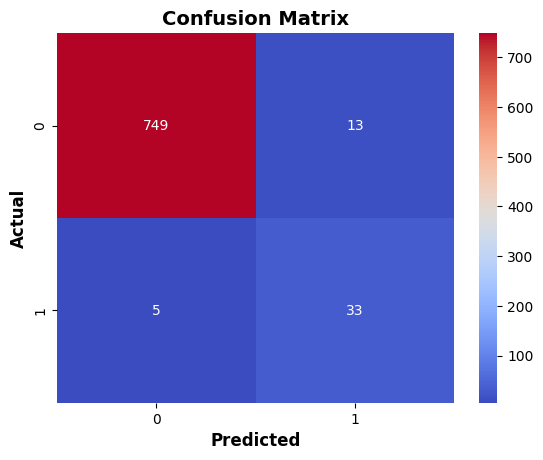

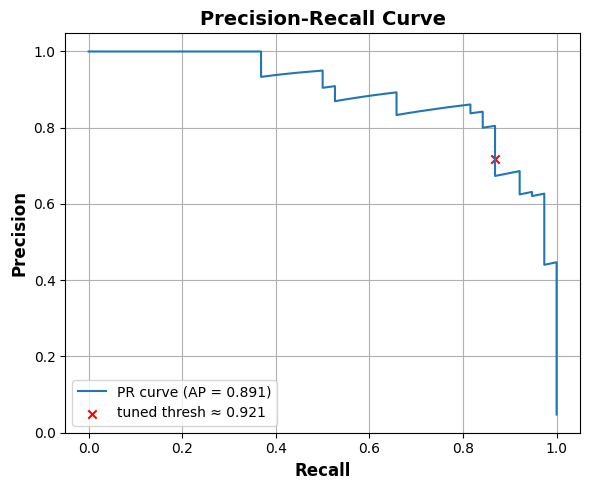

In [6]:
# Retrieving the predicted probabilties and then obtaining the predictions using the threshold of 0.921
y_pred_probs = model.predict_proba(X_test)[:, 1]

y_pred = (y_pred_probs >= threshold).astype(int)

# Printing evaluation metrics, a confusion matrix heatmap, and a precision-recall curve 
print('=== Classification Report ===')
print(classification_report(y_test, y_pred, digits = 3))

print('\n=== Roc AUC Score ===')
print(round(roc_auc_score(y_test, y_pred), 3))

print('\n=== Average Precision Score ===')
print(round(average_precision_score(y_test, y_pred), 3))

print('\n')
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.title('Confusion Matrix', fontsize = 14, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.show()

print('\n')

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_probs)
avg_prec = average_precision_score(y_test, y_pred_probs)

idx_tuned = np.argmin(np.abs(pr_thresholds - threshold)) if len(pr_thresholds) > 0 else -1

plt.figure(figsize = (6, 5))
plt.plot(recall, precision, label = f'PR curve (AP = {avg_prec:.3f})')
plt.scatter(recall[idx_tuned], precision[idx_tuned], label = f'tuned thresh ≈ {threshold:.3f}', marker = 'x', c = 'red')
plt.xlabel('Recall', fontsize = 12, weight = 'bold')
plt.ylabel('Precision', fontsize = 12, weight = 'bold')
plt.title(f'Precision-Recall Curve', fontsize = 14, weight = 'bold')
plt.legend(loc = 'lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary

- **Precision:** 0.717 — 71.7% of predicted positives were correct  
- **Recall:** 0.868 — 86.8% of actual positives were identified  
- **F1 Score:** 0.786 — Balances precision and recall  
- **ROC AUC:** 0.926 — Model ranks positives above negatives 92.6% of the time  
- **Average Precision:** 0.629 — Reflects solid performance across decision thresholds  

The goal of this project was to predict whether an NBA player would be selected to an All-NBA team based on their performance statistics for a given season. The final model demonstrated strong performance, particularly in recall and overall ranking ability. These results suggest the model effectively captures characteristics common among All-NBA caliber players and could be useful for award forecasting, contract negotiations, or media analysis.